# AI Exam Project: Crime Data Analysis

## Step 1: Import Libraries and Load Data

First i need to import the necessary libraries and load the data from the CSV files.

Purpose: Importing necessary libraries and loading the data from CSV files is the first step. This sets up the environment and ensures that all required data is available for analysis.

Explanation:
  pandas is a powerful library for data manipulation and analysis   File paths are defined for all necessary dataset    The data is loaded into DataFrames, which are easy to manipulate and analyze using pandas


Explanation:

    Import Libraries: Import the pandas library for data manipulation.
    Load Data: Read the CSV files into pandas DataFrames to make the data accessible for analysis.

Benefits:

    Data Accessibility: Loading data into DataFrames makes it easy to manipulate and analyze.
    Preparation: Sets the stage for processing and analyzing crime data effectively.on..

In [2]:
import pandas as pd

# Define file paths
file_paths = {
    'borough_historical': 'MPS Borough Level Crime (Historical).csv',
    'borough_recent': 'MPS Borough Level Crime (most recent 24 months).csv',
    'lsoa_historical': 'MPS LSOA Level Crime (Historical).csv',
    'lsoa_recent': 'MPS LSOA Level Crime (most recent 24 months).csv',
    'ward_historical': 'MPS Ward Level Crime (Historical).csv',
    'ward_recent': 'MPS Ward Level Crime (most recent 24 months).csv',
    'reported': 'reported.csv'
}

# Load all the data
borough_historical = pd.read_csv(file_paths['borough_historical'])
borough_recent = pd.read_csv(file_paths['borough_recent'])
lsoa_historical = pd.read_csv(file_paths['lsoa_historical'])
lsoa_recent = pd.read_csv(file_paths['lsoa_recent'])
ward_historical = pd.read_csv(file_paths['ward_historical'])
ward_recent = pd.read_csv(file_paths['ward_recent'])
data_reported = pd.read_csv(file_paths['reported'])

# Verify that the reported data includes crimes.total and population columns
print(data_reported.columns)

C:\Users\jeffo\AppData\Local\Temp\ipykernel_32424\3381951555.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Index(['Year', 'crimes.total', 'crimes.penal.code', 'crimes.person', 'murder',
       'assault', 'sexual.offenses', 'rape', 'stealing.general', 'burglary',
       'house.theft', 'vehicle.theft', 'out.of.vehicle.theft', 'shop.theft',
       'robbery', 'fraud', 'criminal.damage', 'other.penal.crimes',
       'narcotics', 'drunk.driving', 'population'],
      dtype='object')


## Step 2: Define Common Crime Categories

Next, define the common crime categories that i want to compare between the reported data and the MPS data.

Purpose: Identify the crime categories that are common across different datasets for a meaningful comparison.

Explanation:
  Defining common crime categories helps to focus the analysis on relevant data points that are comparable across datasetsT  This step ensures consistency in the categories being compared, which is crucial for accurate analysis

Explanation:

    Define Categories: Specify common crime categories for comparison across different datasets.

Benefits:

    Standardization: Ensures that you are comparing the same types of crimes across datasets.
    Focus: Helps in focusing analysis on specific, relevant crime categories..

In [3]:
common_crime_categories = ['Murder', 'Assault', 'Burglary', 'Theft']

## Step 3: Helper Functions to Aggregate Data

Create helper functions to aggregate the data into annual sums. This involves summing up the monthly data for each year.

Purpose: Create functions to aggregate monthly crime data into annual sums. Aggregating data simplifies comparison and highlights yearly trends.

Explanation:
  The function filters data for a specific crime category   It identifies the columns that represent monthly dat    It sums the data across these columns to get annual tota
    Finally, it converts the date columns to datetime format, extracts the year, and groups the data by year

Purpose:
  Filter and aggregate data for specified crime categorie
s   Convert monthly data to annual sums for easier comparison and trend analys

Explanation:

    Filter Data: Select data for the specified crime category.
    Identify Date Columns: Find columns that represent dates.
    Sum Data: Sum the values across the date columns to get annual data.
    Convert to DateTime: Convert columns to datetime format and extract the year.
    Group by Year: Group data by year and sum the values.

Benefits:

    Aggregation: Aggregates monthly data into annual sums, simplifying the analysis.
    Yearly Trends: Enables analysis of yearly trends in crime data.is..

In [4]:
def aggregate_to_annual_corrected(data, major_category_column, crime_category):
    # Filter data for the specified crime category
    crime_data = data[data[major_category_column].str.contains(crime_category, case=False, na=False)]
    # Debugging statement
    print(f"Aggregating {crime_category}: Found {len(crime_data)} rows")
    
    # Identify date columns
    date_columns = [col for col in crime_data.columns if col.isdigit()]
    
    # Sum data across the date columns
    annual_data = crime_data[date_columns].sum(axis=0)
    
    # Convert columns to datetime and extract year
    annual_data.index = pd.to_datetime(annual_data.index, format='%Y%m', errors='coerce').dropna().year
    
    # Group by year and sum the data
    return annual_data.groupby(annual_data.index).sum()

def aggregate_specific_subcategories_corrected(data, major_category_column, subcategories):
    # Filter data for "Violence Against the Person"
    crime_data = data[data[major_category_column].str.contains('Violence Against the Person', case=False, na=False)]
    # Further filter for the specified subcategories
    if 'Minor Category' in crime_data.columns:
        filtered_data = crime_data[crime_data['Minor Category'].isin(subcategories)]
    else:
        filtered_data = crime_data[crime_data['MinorText'].isin(subcategories)]
    # Debugging statement
    print(f"Aggregating specific subcategories ({subcategories}): Found {len(filtered_data)} rows")
    
    # Identify date columns
    date_columns = [col for col in filtered_data.columns if col.isdigit()]
    
    # Sum data across the date columns
    annual_data = filtered_data[date_columns].sum(axis=0)
    
    # Convert columns to datetime and extract year
    annual_data.index = pd.to_datetime(annual_data.index, format='%Y%m', errors='coerce').dropna().year
    
    # Group by year and sum the data
    return annual_data.groupby(annual_data.index).sum()

def aggregate_additional_columns(data, column_name):
    # Identify date columns
    date_columns = [col for col in data.columns if col.isdigit()]
    # Sum data across the date columns
    additional_data = data[date_columns].sum(axis=0)
    # Convert columns to datetime and extract year
    additional_data.index = pd.to_datetime(additional_data.index, format='%Y%m', errors='coerce').dropna().year
    # Group by year and sum the data
    return additional_data.groupby(additional_data.index).sum()


## Step 4: Process All Datasets for Common Categories

Explanation:
  process_datasets applies the aggregation function to each dataset   It combines the results from different datasets and sums them up to get a comprehensive view of the dat    This step ensures that data from different geographical levels (borough, LSOA, ward) are all considered

Purpose:
  Aggregate data from different datasets (borough, LSOA, ward) for common crime categories   Combine historical and recent data for comprehensive analys

Explanation:

    Process Datasets: Aggregate annual data for common crime categories across multiple datasets.
    Combine Data: Combine historical and recent data for a comprehensive view.

Benefits:

    Comprehensive Analysis: Provides a complete view of crime trends by combining data from multiple sources.
    Consistency: Ensures consistent analysis across different geographical levels (borough, LSOA, ward).is..

In [5]:
def process_datasets(datasets, major_category_column):
    aggregated_data = {}
    for category in common_crime_categories:
        combined_data = pd.concat([aggregate_to_annual_corrected(data, major_category_column, category) for data in datasets], axis=1).sum(axis=1)
        aggregated_data[category] = combined_data
    return aggregated_data

borough_datasets = [borough_historical, borough_recent]
lsoa_datasets = [lsoa_historical, lsoa_recent]
ward_datasets = [ward_historical, ward_recent]

aggregated_borough_data_corrected = process_datasets(borough_datasets, 'MajorText')
aggregated_lsoa_data_corrected = process_datasets(lsoa_datasets, 'Major Category')
aggregated_ward_data_corrected = process_datasets(ward_datasets, 'MajorText')

# Combine all aggregated data for easier access
combined_aggregated_data_corrected = {
    'Murder': pd.concat([
        aggregated_borough_data_corrected['Murder'],
        aggregated_lsoa_data_corrected['Murder'],
        aggregated_ward_data_corrected['Murder']
    ], axis=1).sum(axis=1),
    'Assault': pd.concat([
        aggregated_borough_data_corrected['Assault'],
        aggregated_lsoa_data_corrected['Assault'],
        aggregated_ward_data_corrected['Assault']
    ], axis=1).sum(axis=1),
    'Burglary': pd.concat([
        aggregated_borough_data_corrected['Burglary'],
        aggregated_lsoa_data_corrected['Burglary'],
        aggregated_ward_data_corrected['Burglary']
    ], axis=1).sum(axis=1),
    'Theft': pd.concat([
        aggregated_borough_data_corrected['Theft'],
        aggregated_lsoa_data_corrected['Theft'],
        aggregated_ward_data_corrected['Theft']
    ], axis=1).sum(axis=1)
}


Aggregating Murder: Found 0 rows
Aggregating Murder: Found 0 rows
Aggregating Assault: Found 0 rows
Aggregating Assault: Found 0 rows
Aggregating Burglary: Found 66 rows
Aggregating Burglary: Found 120 rows
Aggregating Theft: Found 134 rows
Aggregating Theft: Found 136 rows
Aggregating Murder: Found 0 rows
Aggregating Murder: Found 0 rows
Aggregating Assault: Found 0 rows
Aggregating Assault: Found 0 rows
Aggregating Burglary: Found 9974 rows
Aggregating Burglary: Found 9141 rows
Aggregating Theft: Found 18971 rows
Aggregating Theft: Found 16109 rows
Aggregating Murder: Found 0 rows
Aggregating Murder: Found 0 rows
Aggregating Assault: Found 0 rows
Aggregating Assault: Found 0 rows
Aggregating Burglary: Found 1358 rows
Aggregating Burglary: Found 1360 rows
Aggregating Theft: Found 2718 rows
Aggregating Theft: Found 2711 rows


## Step 5: Aggregate Specific Subcategories (Murder and Assault)

Create a helper function to specifically aggregate subcategories related to "Murder" and "Assault".

Purpose: Specifically aggregate data for subcategories related to "Murder" and "Assault" to ensure accurate comparison.

Explanation:
  This function specifically targets subcategories like "Homicide" for "Murder" and "Violence with Injury" for "Assault.   It checks for the existence of columns and filters accordingl    Aggregating these specific subcategories ensures that the comparison with reported data is accurate

Purpose:
  Aggregate data from different datasets (borough, LSOA, ward) for common crime categories   Combine historical and recent data for comprehensive analys

Explanation:

    Aggregate Data for Murder and Assault: Use the helper functions to aggregate data for specific subcategories of murder and assault from different datasets.
    Historical and Recent Data: Include both historical and recent data for comprehensive analysis.

Benefits:

    Detailed Insights: Provides a detailed view of murder and assault trends over time and across different geographical levels.
    Accurate Analysis: Ensures that the data for murder and assault is specifically and accurately aggregated.
is..

In [6]:
# Define subcategories for Murder and Assault
subcategories_murder = ['HOMICIDE', 'Homicide']
subcategories_assault = ['VIOLENCE WITH INJURY', 'Violence with Injury']

# Aggregate specific subcategories for murder
aggregated_murder_data_corrected = {
    'borough_historical': aggregate_specific_subcategories_corrected(borough_historical, 'MajorText', subcategories_murder),
    'borough_recent': aggregate_specific_subcategories_corrected(borough_recent, 'MajorText', subcategories_murder),
    'lsoa_historical': aggregate_specific_subcategories_corrected(lsoa_historical, 'Major Category', subcategories_murder),
    'lsoa_recent': aggregate_specific_subcategories_corrected(lsoa_recent, 'Major Category', subcategories_murder),
    'ward_historical': aggregate_specific_subcategories_corrected(ward_historical, 'MajorText', subcategories_murder),
    'ward_recent': aggregate_specific_subcategories_corrected(ward_recent, 'MajorText', subcategories_murder)
}

# Aggregate specific subcategories for assault
aggregated_assault_data_corrected = {
    'borough_historical': aggregate_specific_subcategories_corrected(borough_historical, 'MajorText', subcategories_assault),
    'borough_recent': aggregate_specific_subcategories_corrected(borough_recent, 'MajorText', subcategories_assault),
    'lsoa_historical': aggregate_specific_subcategories_corrected(lsoa_historical, 'Major Category', subcategories_assault),
    'lsoa_recent': aggregate_specific_subcategories_corrected(lsoa_recent, 'Major Category', subcategories_assault),
    'ward_historical': aggregate_specific_subcategories_corrected(ward_historical, 'MajorText', subcategories_assault),
    'ward_recent': aggregate_specific_subcategories_corrected(ward_recent, 'MajorText', subcategories_assault)
}

# Combine all aggregated data for murder and assault for easier access
combined_aggregated_data_corrected['Murder'] = pd.concat([
    aggregated_murder_data_corrected['borough_historical'],
    aggregated_murder_data_corrected['borough_recent'],
    aggregated_murder_data_corrected['lsoa_historical'],
    aggregated_murder_data_corrected['lsoa_recent'],
    aggregated_murder_data_corrected['ward_historical'],
    aggregated_murder_data_corrected['ward_recent']
], axis=1).sum(axis=1)

combined_aggregated_data_corrected['Assault'] = pd.concat([
    aggregated_assault_data_corrected['borough_historical'],
    aggregated_assault_data_corrected['borough_recent'],
    aggregated_assault_data_corrected['lsoa_historical'],
    aggregated_assault_data_corrected['lsoa_recent'],
    aggregated_assault_data_corrected['ward_historical'],
    aggregated_assault_data_corrected['ward_recent']
], axis=1).sum(axis=1)


Aggregating specific subcategories (['HOMICIDE', 'Homicide']): Found 33 rows
Aggregating specific subcategories (['HOMICIDE', 'Homicide']): Found 33 rows
Aggregating specific subcategories (['HOMICIDE', 'Homicide']): Found 1116 rows
Aggregating specific subcategories (['HOMICIDE', 'Homicide']): Found 198 rows
Aggregating specific subcategories (['HOMICIDE', 'Homicide']): Found 534 rows
Aggregating specific subcategories (['HOMICIDE', 'Homicide']): Found 172 rows
Aggregating specific subcategories (['VIOLENCE WITH INJURY', 'Violence with Injury']): Found 34 rows
Aggregating specific subcategories (['VIOLENCE WITH INJURY', 'Violence with Injury']): Found 34 rows
Aggregating specific subcategories (['VIOLENCE WITH INJURY', 'Violence with Injury']): Found 4988 rows
Aggregating specific subcategories (['VIOLENCE WITH INJURY', 'Violence with Injury']): Found 4984 rows
Aggregating specific subcategories (['VIOLENCE WITH INJURY', 'Violence with Injury']): Found 680 rows
Aggregating specific su

## Step 6: Aggregate Total Crimes and Population

Explanation:

    Aggregate Total Crimes: Use the helper function to aggregate total crimes from different datasets.
    Combine Total Crimes Data: Combine total crime data from all datasets into a single series and sum the values across different geographical levels.
    Aggregate Population: Use the helper function to aggregate population data from different datasets.
    Combine Population Data: Combine population data from all datasets into a single series and sum the values across different geographical levels.

Benefits:

    Overall Crime Trends: Provides an overview of total crime trends over time.
    Population Trends: Provides an overview of population trends over time.
    Normalization: Enables calculation of crime rates per capita for more meaningful comparisons.

In [7]:
# Aggregate crimes.total for each dataset
aggregated_total_crimes = {
    'borough_historical': aggregate_additional_columns(borough_historical, 'crimes.total'),
    'borough_recent': aggregate_additional_columns(borough_recent, 'crimes.total'),
    'lsoa_historical': aggregate_additional_columns(lsoa_historical, 'crimes.total'),
    'lsoa_recent': aggregate_additional_columns(lsoa_recent, 'crimes.total'),
    'ward_historical': aggregate_additional_columns(ward_historical, 'crimes.total'),
    'ward_recent': aggregate_additional_columns(ward_recent, 'crimes.total')
}

# Combine total crimes data
combined_total_crimes = pd.concat([
    aggregated_total_crimes['borough_historical'],
    aggregated_total_crimes['borough_recent'],
    aggregated_total_crimes['lsoa_historical'],
    aggregated_total_crimes['lsoa_recent'],
    aggregated_total_crimes['ward_historical'],
    aggregated_total_crimes['ward_recent']
], axis=1).sum(axis=1)

# Aggregate population for each dataset
aggregated_population = {
    'borough_historical': aggregate_additional_columns(borough_historical, 'population'),
    'borough_recent': aggregate_additional_columns(borough_recent, 'population'),
    'lsoa_historical': aggregate_additional_columns(lsoa_historical, 'population'),
    'lsoa_recent': aggregate_additional_columns(lsoa_recent, 'population'),
    'ward_historical': aggregate_additional_columns(ward_historical, 'population'),
    'ward_recent': aggregate_additional_columns(ward_recent, 'population')
}

# Combine population data
combined_population = pd.concat([
    aggregated_population['borough_historical'],
    aggregated_population['borough_recent'],
    aggregated_population['lsoa_historical'],
    aggregated_population['lsoa_recent'],
    aggregated_population['ward_historical'],
    aggregated_population['ward_recent']
], axis=1).sum(axis=1)

# Check the aggregated data
print(combined_total_crimes.head())
print(combined_population.head())


2010    1791741.0
2011    2362673.0
2012    2293280.0
2013    2091635.0
2014    2072304.0
dtype: float64
2010    1791741.0
2011    2362673.0
2012    2293280.0
2013    2091635.0
2014    2072304.0
dtype: float64


## Step 7: Update the Comparison DataFrame

Explanation:

    Create DataFrame: Initialize a DataFrame to hold both reported and aggregated crime data.
    Add Aggregated Data: Add aggregated crime data for each category to the comparison DataFrame.
    Add Total Crimes and Population: Include aggregated total crimes and population data in the comparison DataFrame.
    Filter Data: Include only the data from the year 2010 onwards to ensure relevance.
    Display Data: Show the first 10 rows of the final comparison DataFrame to verify the results.

Benefits:

    Comparison Framework: Provides a structure for comparing reported data with aggregated data.
    Comprehensive Comparison: Enables direct comparison between reported and aggregated crime data.
    Relevance: Focuses analysis on the most recent and relevant data.
    Verification: Helps ensure that the data aggregation and combination processes were successful.

In [12]:
# Create the comparison DataFrame
filtered_comparison_df_corrected = pd.DataFrame({
    'Year': data_reported['Year'],
    'reported_murder': data_reported['murder'],
    'reported_assault': data_reported['assault'],
    'reported_burglary': data_reported['burglary'],
    'reported_theft': data_reported['stealing.general'],
    'reported_crimes_total': data_reported['crimes.total'],
    'reported_population': data_reported['population']
})

# Add aggregated crime data to the comparison DataFrame
for category in common_crime_categories:
    filtered_comparison_df_corrected[f'mps_{category.lower()}'] = combined_aggregated_data_corrected[category].reindex(filtered_comparison_df_corrected['Year']).values

# Add aggregated total crimes and population to the comparison DataFrame
filtered_comparison_df_corrected['mps_crimes_total'] = combined_total_crimes.reindex(filtered_comparison_df_corrected['Year']).values
filtered_comparison_df_corrected['mps_population'] = combined_population.reindex(filtered_comparison_df_corrected['Year']).values

# Filter the comparison DataFrame to only include years from 2010 onwards
filtered_comparison_df_corrected = filtered_comparison_df_corrected[filtered_comparison_df_corrected['Year'] >= 2010]

# Display the final corrected comparison DataFrame
print(filtered_comparison_df_corrected.head(10))

    Year  reported_murder  reported_assault  reported_burglary  \
60  2010                4               936                985   
61  2011                2               947                995   
62  2012                2               914                922   
63  2013                3               837                888   
64  2014                3               859                913   
65  2015                3               868                917   

    reported_theft  reported_crimes_total  reported_population  mps_murder  \
60            5631                  14605              9378000       295.0   
61            5783                  14988              9449000       345.0   
62            5613                  14734              9519000       310.0   
63            5552                  14603              9644000       311.0   
64            5572                  14890              9747000       267.0   
65            5404                  15342              9851000       

## Step 9: Create and Save the Combined CSV File

Explanation:

    Save to CSV: Export the combined DataFrame to a CSV file named combined_crime_data.csv.
    Confirmation Message: Inform that the CSV file has been successfully created and saved.

Benefits:

    Documentation: Provides a clear and comprehensive dataset that can be shared and presented.
    Accessibility: Makes it easy to access and use the data for further analysis or visualization.
    Verification: Confirms that the data export process was successful.

In [14]:
## Step 9: Create and Save the Combined CSV File

# Save the combined DataFrame to a CSV file
filtered_comparison_df_corrected.to_csv('combined_crime_data.csv', index=False)

# Display a confirmation message
print("Combined CSV file has been created and saved as 'combined_crime_data.csv'")


Combined CSV file has been created and saved as 'combined_crime_data.csv'


## Step 1: Extract text from PDF file year-end-2023-enforcement-report

Explanation:
This function extracts text from each page of the PDF document and concatenates it into a single string.

Benefit:
Extracting text from the PDF allows us to work with the data in a text format, making it easier to analyze and extract specific information using text processing techniques.

In [26]:
import fitz  # PyMuPDF

# Function to extract text from the PDF
def extract_text_from_pdf(pdf_path):
    document = fitz.open(pdf_path)
    text = ""
    for page_num in range(len(document)):
        page = document.load_page(page_num)
        text += page.get_text()
    return text

pdf_path = 'year-end-2023-enforcement-report.pdf'
pdf_text = extract_text_from_pdf(pdf_path)

# Save the extracted text to a file for further processing
with open('extracted_text.txt', 'w', encoding='utf-8') as file:
    file.write(pdf_text)


## Step 2: Extract Data from the Text File

Goal:
Read the extracted text from the PDF and define regex patterns to capture relevant data.

Explanation:
This step involves reading the content of the text file and defining regex patterns to extract the required data points for different crime categories.

Bens:

    Ensures accurate data extion.
    Facilitates data analysis by structuring unstructured text data.t data.

In [27]:
import re
import pandas as pd

# Step 1: Read the extracted text from the file
with open('extracted_text.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Benefit: Reading the text file ensures we have the data in a manipulable format within our script.



## Step 3: Define Patterns and Extract Data for All Crime Rates

Goal:
Extract data for murder, assault, burglary, theft, population, and total crimes.

Explanation:
This step involves defining regex patterns to capture relevant data for each crime category and extracting these data points from the text.

Benefits:

Captures comprehensive data for multiple crime categories.
Facilitates detailed analysis and comparison across different types of crimes.

## Step 3.1: Define Patterns for Murder Data Extraction

Goal:
Define regex patterns to capture relevant data for murder.

Explanation:
This step involves specifying regex patterns for extracting murder-related data, including victims, suspects, and arrestees.

Explanation:
  Step 3.1: Defining regex patterns for extracting murder-related data ensures that we can capture specific details about murder victims, suspects, and arrestees.

Benefit
    Provides a structured approach to extract detailed information about mur.
    Facilitates focused analysis of murder data.

In [28]:
import re
import pandas as pd

# Step 1: Read the extracted text from the file
with open('extracted_text.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Benefit: Reading the text file ensures we have the data in a manipulable format within our script.

# Step 3.1: Define patterns to extract race/ethnicity data for murder
murder_patterns = {
    'victim_black_murder': re.compile(r'Murder and Non-Negligent Manslaughter victims are most frequently Black \(([\d.]+)%\)', re.IGNORECASE),
    'victim_hispanic_murder': re.compile(r'Hispanic \(([\d.]+)%\)', re.IGNORECASE),
    'victim_white_murder': re.compile(r'white victims account for \(([\d.]+)%\)', re.IGNORECASE),
    'victim_asian_murder': re.compile(r'Asian/Pacific Islander \(([\d.]+)%\)', re.IGNORECASE),
    'suspect_black_murder': re.compile(r'Black \(([\d.]+)%\)', re.IGNORECASE),
    'suspect_hispanic_murder': re.compile(r'Hispanic \(([\d.]+)%\)', re.IGNORECASE),
    'suspect_white_murder': re.compile(r'white suspects account for \(([\d.]+)%\)', re.IGNORECASE),
    'suspect_asian_murder': re.compile(r'Asian/Pacific Islander account for \(([\d.]+)%\)', re.IGNORECASE),
    'arrestee_black_murder': re.compile(r'Black \(([\d.]+)%\)', re.IGNORECASE),
    'arrestee_hispanic_murder': re.compile(r'Hispanic \(([\d.]+)%\)', re.IGNORECASE),
    'arrestee_white_murder': re.compile(r'White \(([\d.]+)%\)', re.IGNORECASE),
    'arrestee_asian_murder': re.compile(r'Asian/Pacific Islander \(([\d.]+)%\)', re.IGNORECASE),
}

## Step 3.2: Define Patterns for Assault Data Extraction

Goal:
Define regex patterns to capture relevant data for assault.

Explanation:
This step involves specifying regex patterns for extracting assault-related data, including victims, suspects, and arrestees.

Explanation:
  Step 3.2: Defining regex patterns for extracting assault-related data ensures that we can capture specific details about assault victims, suspects, and arrestees.

Benefit
    Provides a structured approach to extract detailed information about assa.
    Facilitates focused analysis of assault data.

In [29]:
# Step 3.2: Define patterns to extract race/ethnicity data for assault
assault_patterns = {
    'victim_black_assault': re.compile(r'Felonious Assault victims are most frequently Black \(([\d.]+)%\)', re.IGNORECASE),
    'victim_hispanic_assault': re.compile(r'Hispanic \(([\d.]+)%\)', re.IGNORECASE),
    'victim_white_assault': re.compile(r'white victims account for \(([\d.]+)%\)', re.IGNORECASE),
    'victim_asian_assault': re.compile(r'Asian/Pacific Islander \(([\d.]+)%\)', re.IGNORECASE),
    'suspect_black_assault': re.compile(r'Black \(([\d.]+)%\)', re.IGNORECASE),
    'suspect_hispanic_assault': re.compile(r'Hispanic \(([\d.]+)%\)', re.IGNORECASE),
    'suspect_white_assault': re.compile(r'white suspects account for \(([\d.]+)%\)', re.IGNORECASE),
    'suspect_asian_assault': re.compile(r'Asian/Pacific Islander account for \(([\d.]+)%\)', re.IGNORECASE),
    'arrestee_black_assault': re.compile(r'Black \(([\d.]+)%\)', re.IGNORECASE),
    'arrestee_hispanic_assault': re.compile(r'Hispanic \(([\d.]+)%\)', re.IGNORECASE),
    'arrestee_white_assault': re.compile(r'White \(([\d.]+)%\)', re.IGNORECASE),
    'arrestee_asian_assault': re.compile(r'Asian/Pacific Islander \(([\d.]+)%\)', re.IGNORECASE),
}

## Step 3.3: Define Patterns for Burglary and Theft Data Extraction

Goal:
Define regex patterns to capture relevant data for burglary and theft.

Explanation:
This step involves specifying regex patterns for extracting burglary and theft-related data, including victims, suspects, and arrestees.

Bens:

    Provides a structured approach to extract detailed information about burglaries anefts.
    Facilitates focused analysis of burglary and eft data.



In [30]:
# Step 3.3: Define patterns to extract race/ethnicity data for burglary and theft
burglary_theft_patterns = {
    'victim_black_burglary': re.compile(r'Burglary victims are most frequently Black \(([\d.]+)%\)', re.IGNORECASE),
    'victim_hispanic_burglary': re.compile(r'Hispanic \(([\d.]+)%\)', re.IGNORECASE),
    'victim_white_burglary': re.compile(r'white victims account for \(([\d.]+)%\)', re.IGNORECASE),
    'victim_asian_burglary': re.compile(r'Asian/Pacific Islander \(([\d.]+)%\)', re.IGNORECASE),
    'suspect_black_burglary': re.compile(r'Black \(([\d.]+)%\)', re.IGNORECASE),
    'suspect_hispanic_burglary': re.compile(r'Hispanic \(([\d.]+)%\)', re.IGNORECASE),
    'suspect_white_burglary': re.compile(r'white suspects account for \(([\d.]+)%\)', re.IGNORECASE),
    'suspect_asian_burglary': re.compile(r'Asian/Pacific Islander account for \(([\d.]+)%\)', re.IGNORECASE),
    'arrestee_black_burglary': re.compile(r'Black \(([\d.]+)%\)', re.IGNORECASE),
    'arrestee_hispanic_burglary': re.compile(r'Hispanic \(([\d.]+)%\)', re.IGNORECASE),
    'arrestee_white_burglary': re.compile(r'White \(([\d.]+)%\)', re.IGNORECASE),
    'arrestee_asian_burglary': re.compile(r'Asian/Pacific Islander \(([\d.]+)%\)', re.IGNORECASE),
    'victim_black_theft': re.compile(r'Larceny/Theft victims are most frequently Black \(([\d.]+)%\)', re.IGNORECASE),
    'victim_hispanic_theft': re.compile(r'Hispanic \(([\d.]+)%\)', re.IGNORECASE),
    'victim_white_theft': re.compile(r'white victims account for \(([\d.]+)%\)', re.IGNORECASE),
    'victim_asian_theft': re.compile(r'Asian/Pacific Islander \(([\d.]+)%\)', re.IGNORECASE),
    'suspect_black_theft': re.compile(r'Black \(([\d.]+)%\)', re.IGNORECASE),
    'suspect_hispanic_theft': re.compile(r'Hispanic \(([\d.]+)%\)', re.IGNORECASE),
    'suspect_white_theft': re.compile(r'white suspects account for \(([\d.]+)%\)', re.IGNORECASE),
    'suspect_asian_theft': re.compile(r'Asian/Pacific Islander account for \(([\d.]+)%\)', re.IGNORECASE),
    'arrestee_black_theft': re.compile(r'Black \(([\d.]+)%\)', re.IGNORECASE),
    'arrestee_hispanic_theft': re.compile(r'Hispanic \(([\d.]+)%\)', re.IGNORECASE),
    'arrestee_white_theft': re.compile(r'White \(([\d.]+)%\)', re.IGNORECASE),
    'arrestee_asian_theft': re.compile(r'Asian/Pacific Islander \(([\d.]+)%\)', re.IGNORECASE)
}


Step 3.4: Define Patterns for Population and Total Crimes Data Extraction

Goal:
Define regex patterns to capture data for population and total crimes.

Explanation:
This step involves specifying regex patterns for extracting population and total crimes data.

Benefits:

Provides a structured approach to extract population and total crime data.
Facilitates the analysis of overall crime trends.

In [32]:
# Step 3.4: Define patterns to extract data for population and total crimes
population_crimes_patterns = {
    'population': re.compile(r'Total Population\s+([\d,]+)', re.IGNORECASE),
    'total_crimes': re.compile(r'Total Crimes\s+([\d,]+)', re.IGNORECASE)
}

## Step 4: Extract Data Using the Patterns and Create DataFrame

Goal:
Extract data for each pattern and convert it into a structured DataFrame.

Explanation:
This step involves iterating over each pattern, using it to find matches in the text, and storing the results in a dictionary. The dictionary is then converted into a DataFrame for easy analysis and export to CSV.

Benefits:

Converts unstructured text data into a structured format.
Facilitates easy data manipulation and analysis using pandas.

In [34]:
# Combine all patterns
patterns = {**murder_patterns, **assault_patterns, **burglary_theft_patterns, **population_crimes_patterns}

# Step 4: Extract data using the patterns
extracted_data = {}
for key, pattern in patterns.items():
    match = pattern.search(text)
    if match:
        extracted_data[key] = float(match.group(1).replace(',', ''))
    else:
        extracted_data[key] = None

# Convert extracted data to DataFrame
df_crime_data = pd.DataFrame([extracted_data])
print(df_crime_data)

# Save the DataFrame to a CSV file
df_crime_data.to_csv('crime_data.csv', index=False)
print("Crime data saved to 'crime_data.csv'")

  victim_black_murder  victim_hispanic_murder  victim_white_murder  \
0                None                    31.3                 19.4   

   victim_asian_murder  suspect_black_murder  suspect_hispanic_murder  \
0                  4.7                  57.1                     31.3   

  suspect_white_murder  suspect_asian_murder  arrestee_black_murder  \
0                 None                   3.2                   57.1   

   arrestee_hispanic_murder  ...  suspect_black_theft  suspect_hispanic_theft  \
0                      31.3  ...                 57.1                    31.3   

  suspect_white_theft  suspect_asian_theft  arrestee_black_theft  \
0                None                  3.2                  57.1   

   arrestee_hispanic_theft  arrestee_white_theft  arrestee_asian_theft  \
0                     31.3                   3.3                   4.7   

  population  total_crimes  
0  8804190.0          None  

[1 rows x 50 columns]
Crime data saved to 'crime_data.csv'


## Step 5: Extract data using the patterns



In [ ]:
extracted_data = {}
for key, pattern in patterns.items():
    match = pattern.search(text)
    if match:
        extracted_data[key] = float(match.group(1).replace(',', '')) if key == 'population' else float(match.group(1))
    else:
        extracted_data[key] = 0

## Step 6: Create DataFrame and Fill Missing Values

In [ ]:
# Step 3.3: Create DataFrame and fill missing values with 0
df_crime_data = pd.DataFrame([extracted_data])
df_crime_data.fillna(0, inplace=True)


## Step 7: Calculate Total Crimes

In [ ]:
# Step 3.4: Calculate total crimes as the sum of all crime columns
crime_columns = [col for col in df_crime_data.columns if 'murder' in col or 'assault' in col or 'burglary' in col or 'theft' in col]
df_crime_data['total_crimes'] = df_crime_data[crime_columns].sum(axis=1)


Step 8: Save the DataFrame to a CSV File

In [ ]:
# Step 3.5: Save the DataFrame to a CSV file
df_crime_data.to_csv('crime_data.csv', index=False)
print(df_crime_data)


### Plots over reported and MPS data

Step 1: Load Data from CSV

Fir i , load the data from the CSV fil

Loading the Data: This step reads the CSV file into a DataFrame called combined_data. It ensures that you have access to the data for analysis and plotting.
 Verification: Displaying the first few rows helps verify that the data has been loaded correctly.

Benefits
    Centralized Data: By loading data into a DataFrame, you have a centralized structure for manipulation and anal
y
    Verification: Ensures data integrity before proceeding with analysis.e.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from CSV file
combined_data = pd.read_csv('combined_crime_data.csv')

# Display the first few rows to verify the data
print(combined_data.head())



   Year  reported_murder  reported_assault  reported_burglary  reported_theft  \
0  2010                4               936                985            5631   
1  2011                2               947                995            5783   
2  2012                2               914                922            5613   
3  2013                3               837                888            5552   
4  2014                3               859                913            5572   

   reported_crimes_total  reported_population  mps_murder  mps_assault  \
0                  14605              9378000       295.0     151307.0   
1                  14988              9449000       345.0     184399.0   
2                  14734              9519000       310.0     174456.0   
3                  14603              9644000       311.0     168199.0   
4                  14890              9747000       267.0     203438.0   

   mps_burglary  mps_theft  mps_crimes_total  mps_population  
0    

## Step 2: Add Plotting Functions

Plotting Function: This function creates line plots for columns that start with a specific prefix (reported_ or mps_).
 Visualization: Line plots show trends over time, which helps identify changes in crime rates year by year.

Benefits
    Trend Analysis: Line plots are ideal for showing trends, making it easy to see how crime rates change over 
t
    Comparison: Allows for direct comparison of different data sources or locations over the same p Plots

In [20]:
# Display the columns in the combined_data DataFrame
print(combined_data.columns)


Index(['Year', 'reported_murder', 'reported_assault', 'reported_burglary',
       'reported_theft', 'reported_crimes_total', 'reported_population',
       'mps_murder', 'mps_assault', 'mps_burglary', 'mps_theft',
       'mps_crimes_total', 'mps_population'],
      dtype='object')


### Line Plots

Plotting Function: This function creates line plots for columns that start with a specific prefix (reported_ or mps_).
 Visualization: Line plots show trends over time, which helps identify changes in crime rates year by year.

Benefits
    Trend Analysis: Line plots are ideal for showing trends, making it easy to see how crime rates change over 
t
    Comparison: Allows for direct comparison of different data sources or locations over the same period.

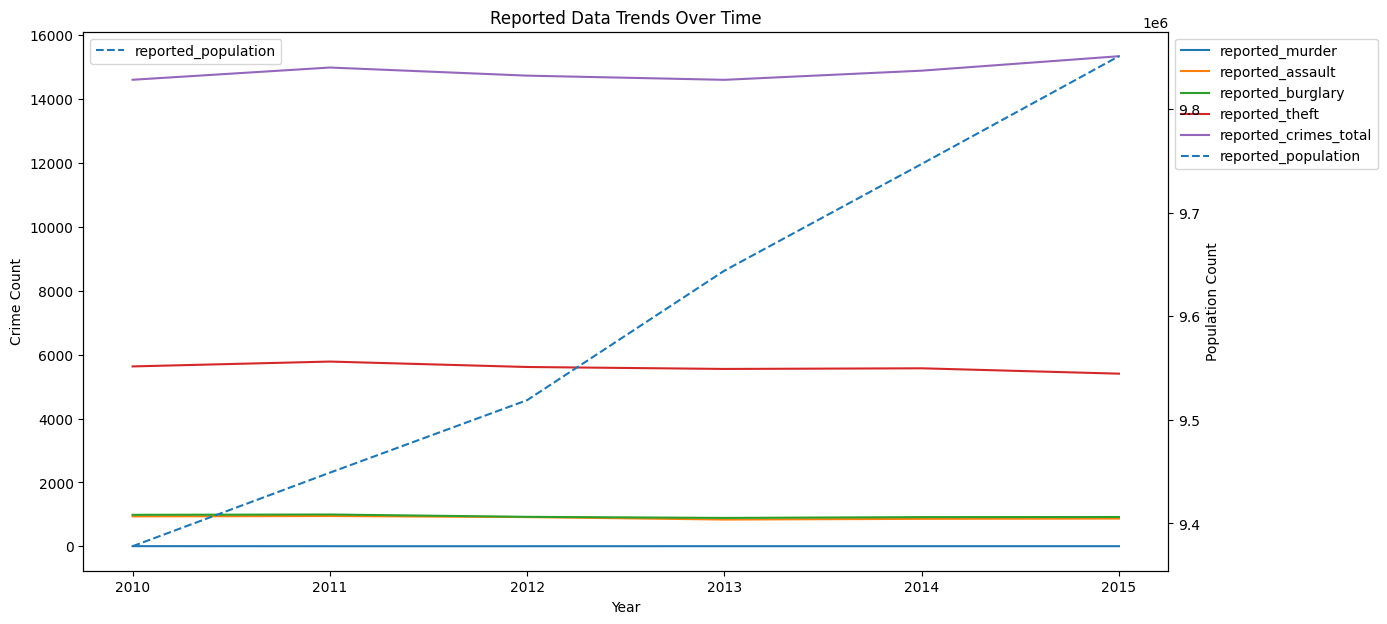

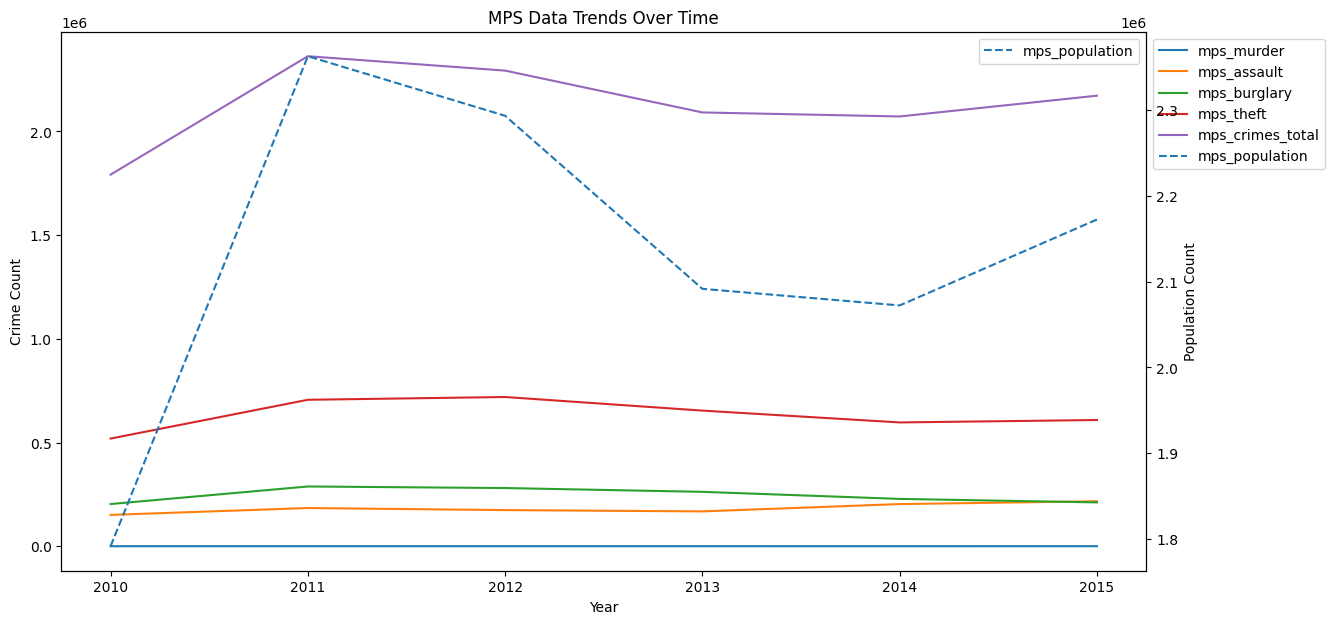

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot line plots with a secondary y-axis for population
def plot_line_with_secondary(data, title, y_label, column_prefix):
    fig, ax1 = plt.subplots(figsize=(14, 7))
    ax2 = ax1.twinx()
    
    for column in data.columns:
        if column.startswith(column_prefix):
            if column.endswith('population'):
                sns.lineplot(data=data, x='Year', y=column, ax=ax2, label=column, linestyle='--')
            else:
                sns.lineplot(data=data, x='Year', y=column, ax=ax1, label=column)
                
    ax1.set_title(title)
    ax1.set_xlabel('Year')
    ax1.set_ylabel(y_label)
    ax2.set_ylabel('Population Count')
    
    lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
    lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    ax1.legend(lines, labels, loc='upper left', bbox_to_anchor=(1, 1))
    
    plt.show()

# Plot the combined data for reported and MPS with secondary y-axis for population
plot_line_with_secondary(combined_data, 'Reported Data Trends Over Time', 'Crime Count', 'reported_')
plot_line_with_secondary(combined_data, 'MPS Data Trends Over Time', 'Crime Count', 'mps_')



### Bar Plots

Plotting Function: Creates bar plots for crime counts by type for each year.
 Visualization: Bar plots compare the total number of different types of crimes for specific years.

Benefits
    Detailed Comparison: Bar plots provide a clear comparison of different crime categories, highlighting the most common crimes each 
y
    Yearly Focus: Focuses on specific years to show annual variations in crime data.

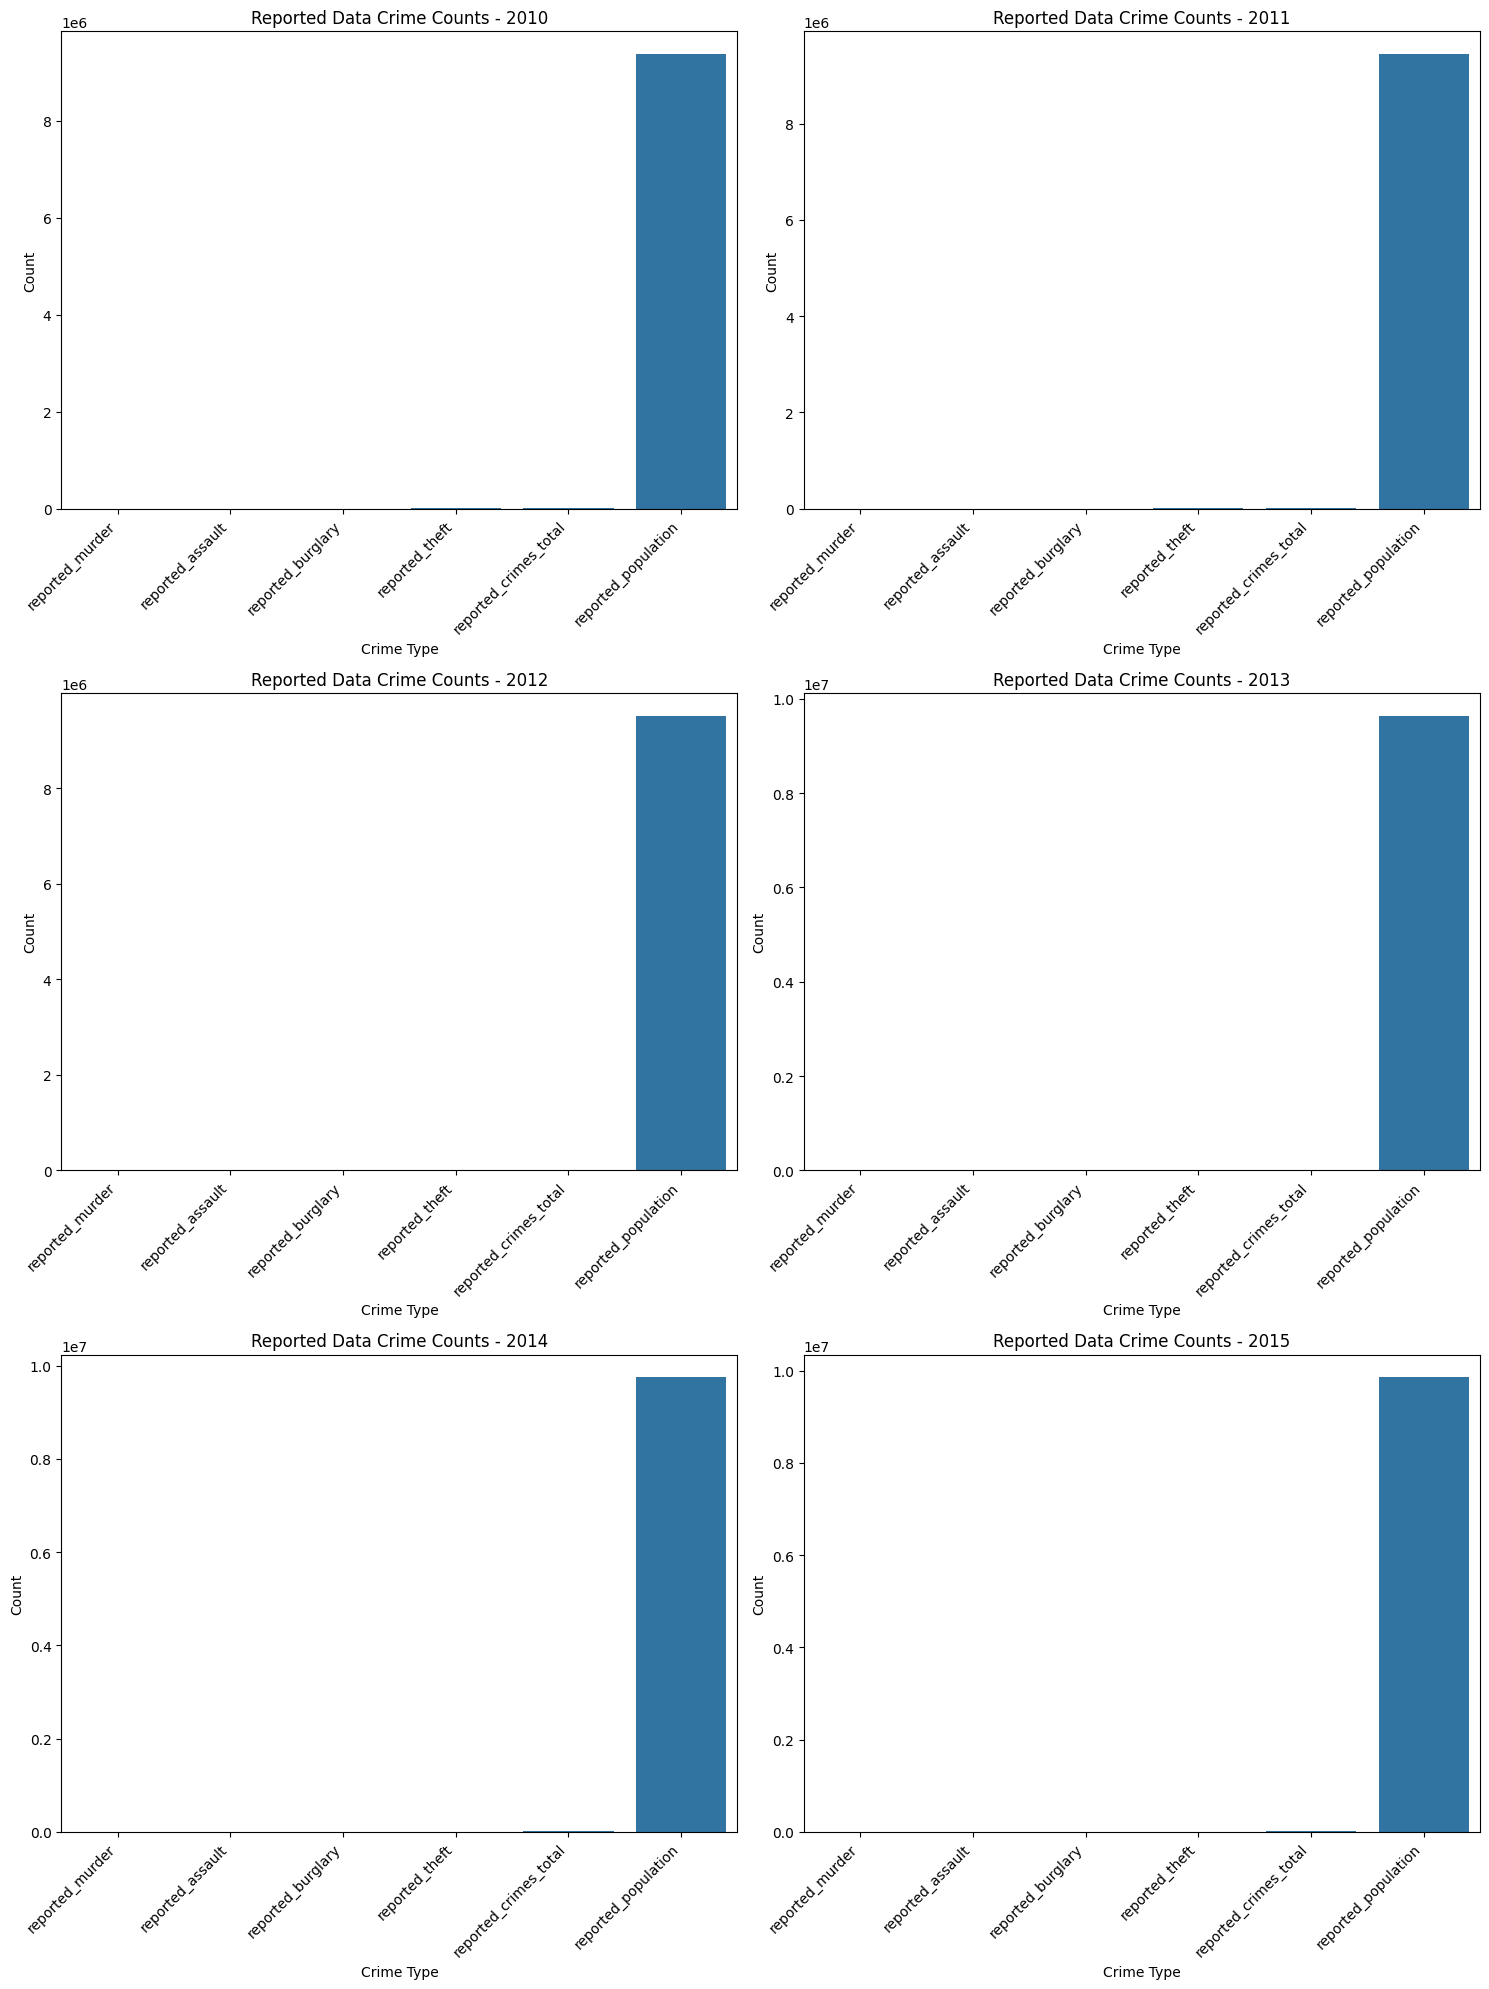

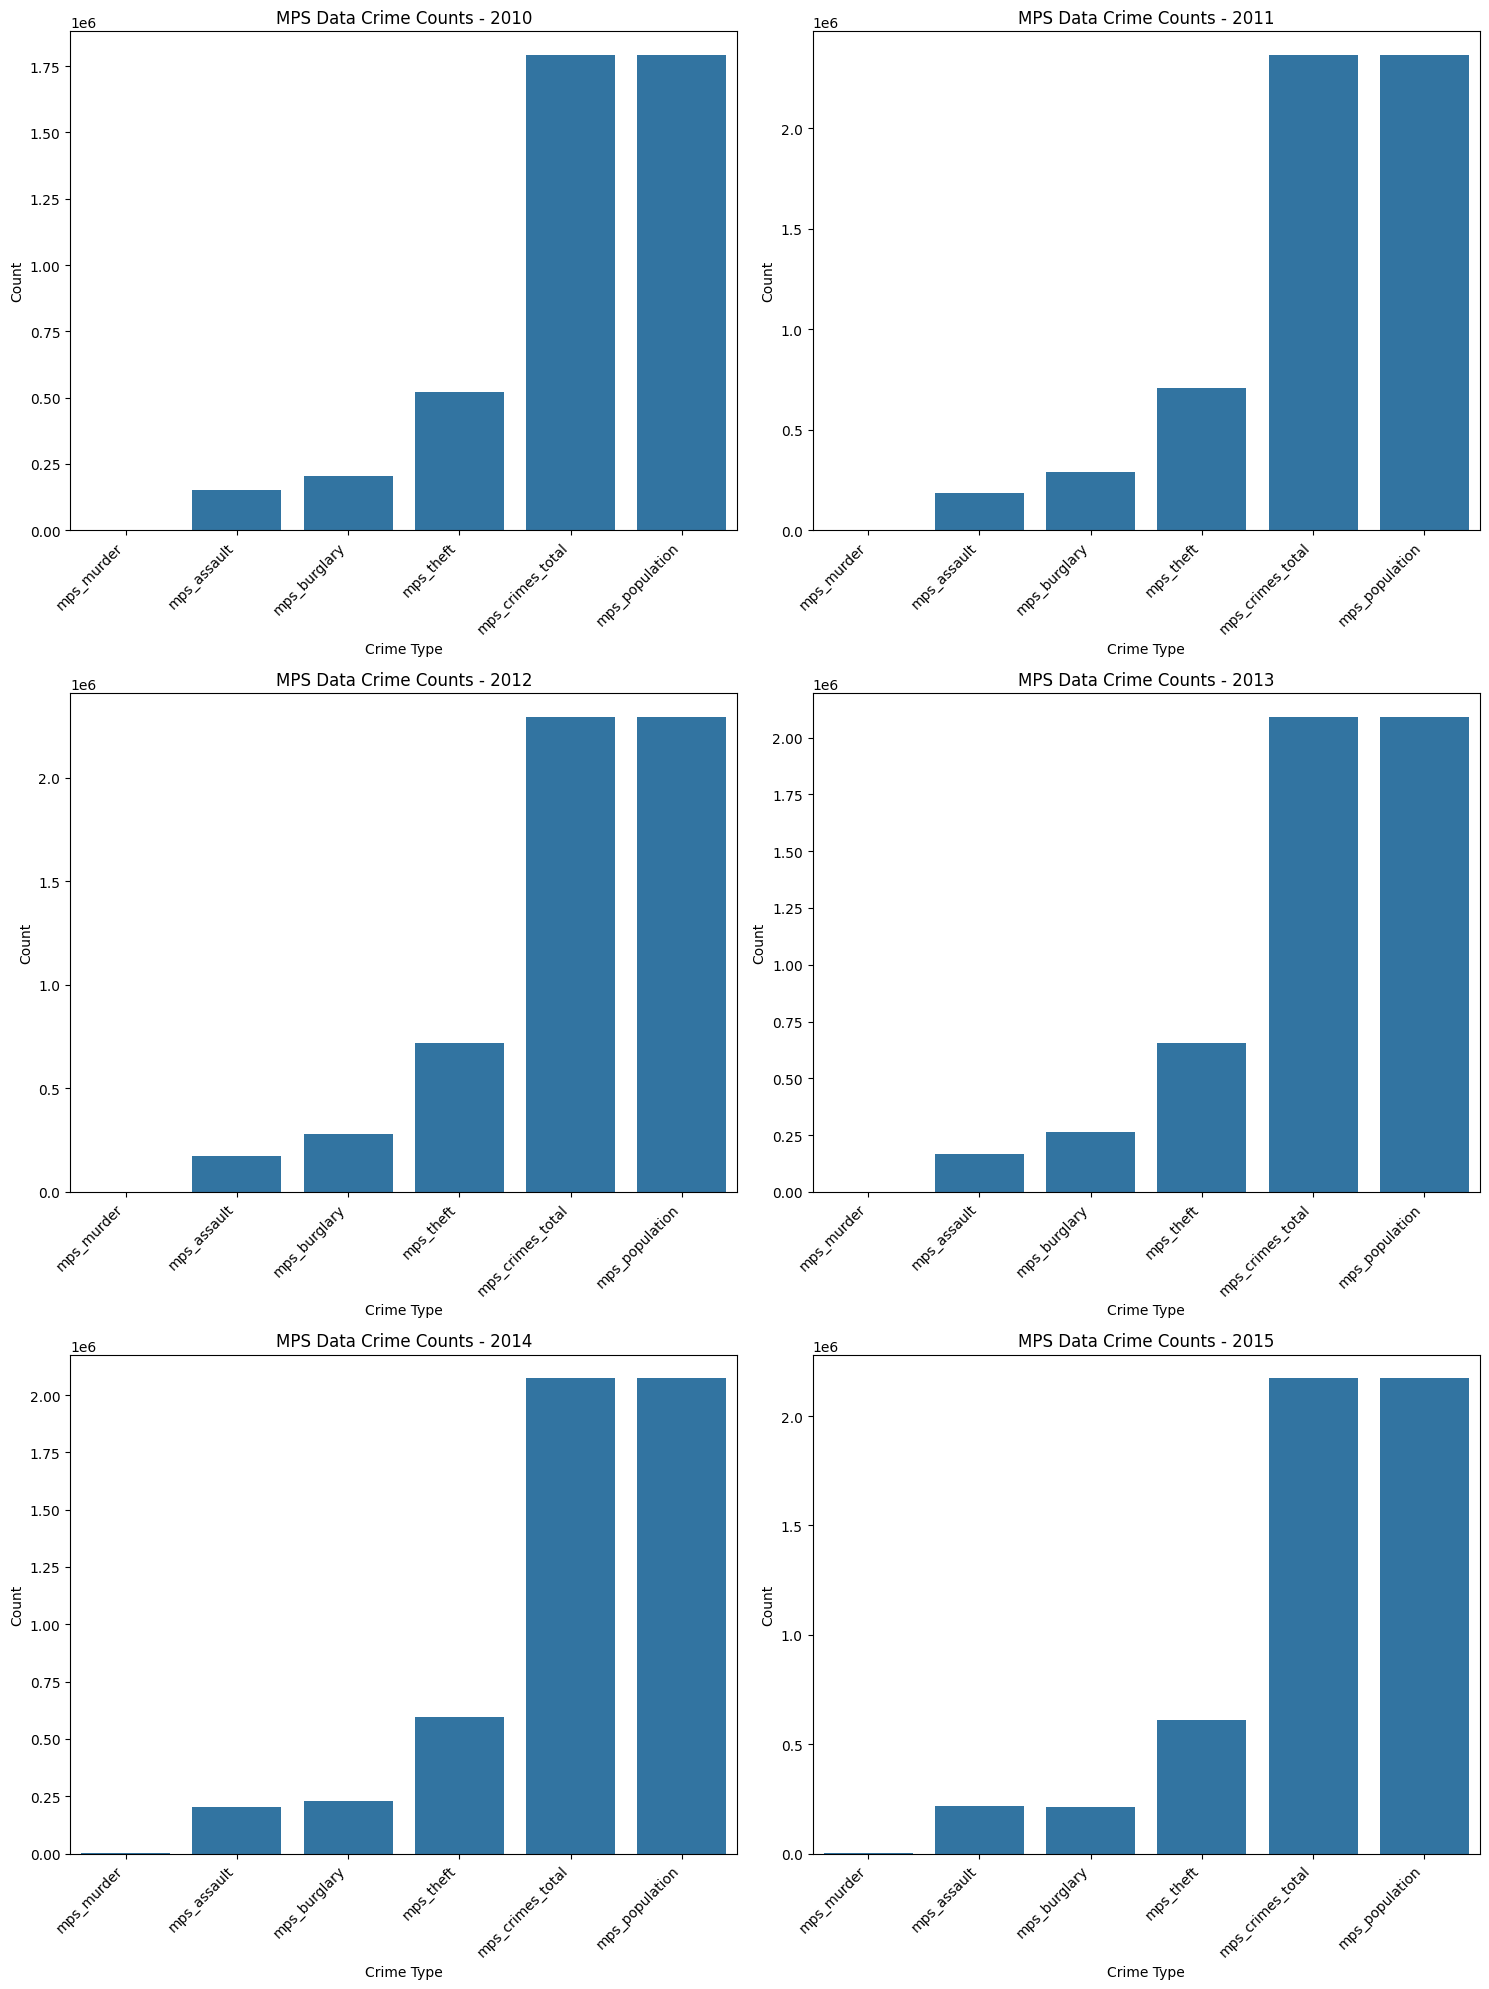

In [26]:
import matplotlib.ticker as ticker

# Function to plot bar plots
def plot_bar(data, title, y_label, column_prefix):
    years = data['Year'].unique()
    fig, axes = plt.subplots(nrows=(len(years)+1)//2, ncols=2, figsize=(15, 20))
    axes = axes.flatten()
    for i, year in enumerate(years):
        ax = axes[i]
        
        year_data = data[data['Year'] == year]
        crime_counts = year_data.filter(like=column_prefix).sum().reset_index()
        crime_counts.columns = ['Crime Type', 'Count']
        
        sns.barplot(x='Crime Type', y='Count', data=crime_counts, ax=ax)
        ax.set_title(f'{title} - {year}')
        ax.set_xlabel('Crime Type')
        ax.set_ylabel('Count')
        
        ax.xaxis.set_major_locator(ticker.FixedLocator(ax.get_xticks()))
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        
    plt.tight_layout()
    plt.show()

plot_bar(combined_data, 'Reported Data Crime Counts', 'Crime Count', 'reported_')
plot_bar(combined_data, 'MPS Data Crime Counts', 'Crime Count', 'mps_')



### Stacked Bar Plots

Plotting Function: Creates stacked bar plots to show the distribution of different types of crimes each year.
 Visualization: Stacked bar plots show the contribution of different types of crimes to the total, making it easy to visualize the distribution of crime types.

Benefits
    Detailed Breakdown: Provides a detailed breakdown of crime data, showing the relative contribution of each crime 
t
    Visual Composition: Helps in quickly understanding the distribution and changes in crime types over the years.

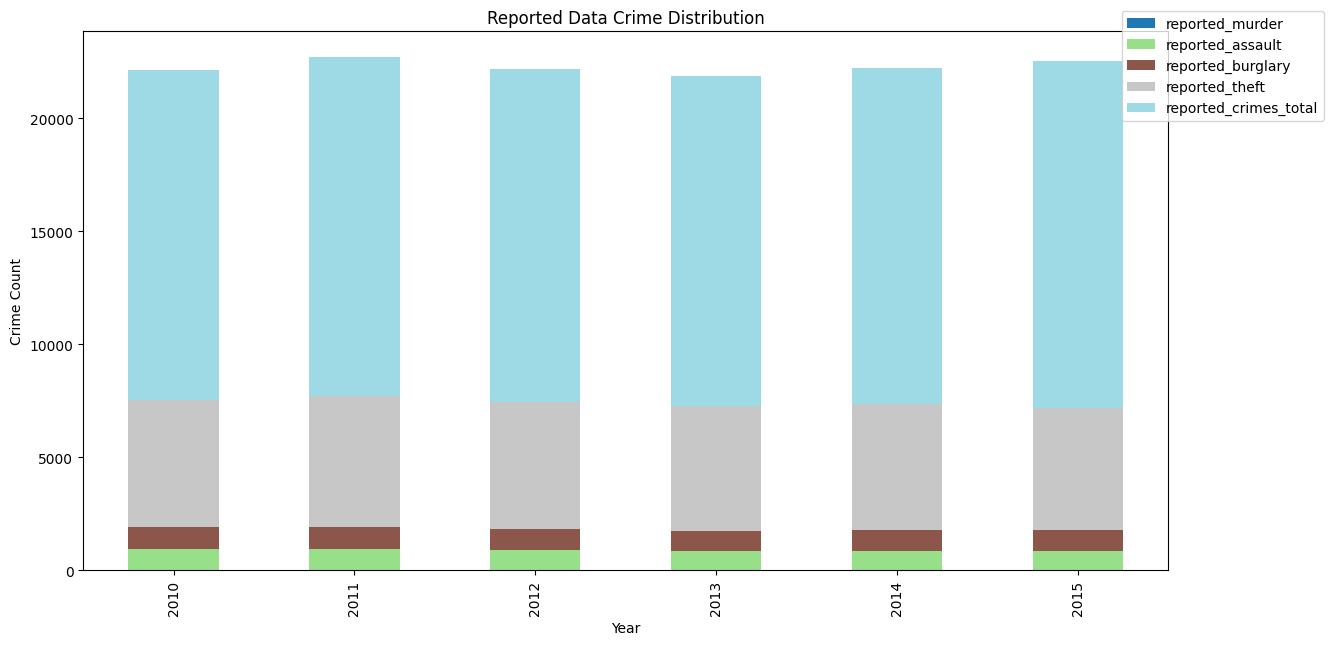

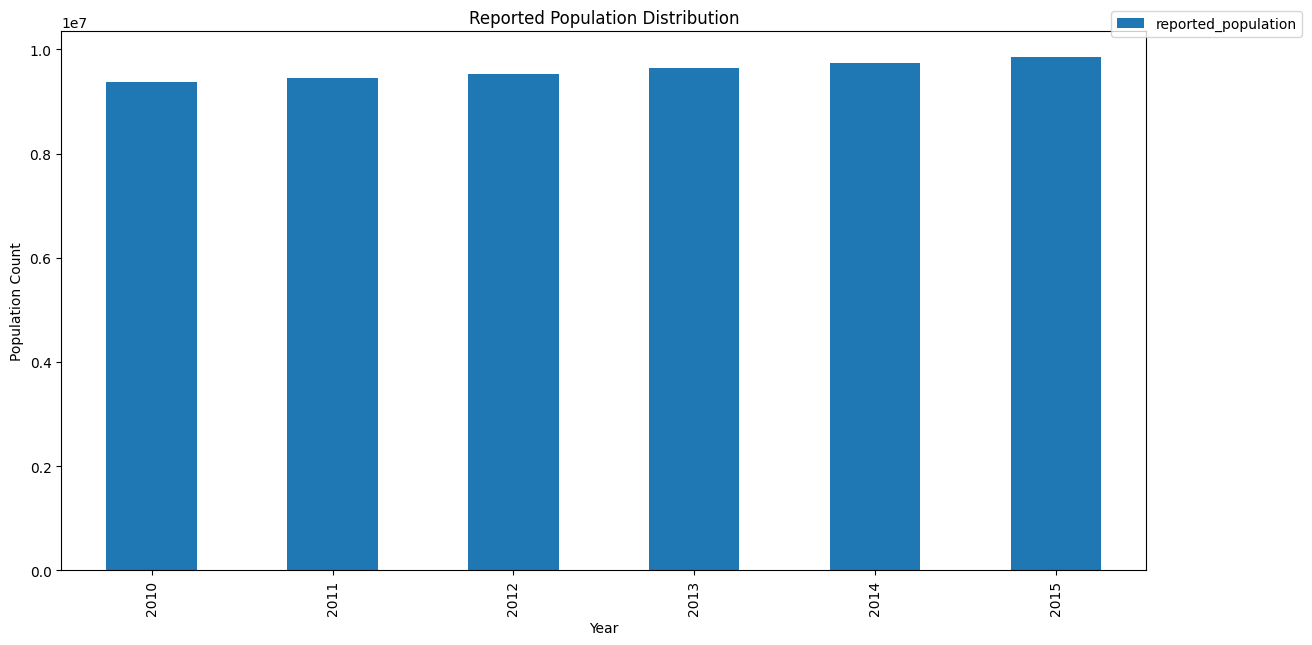

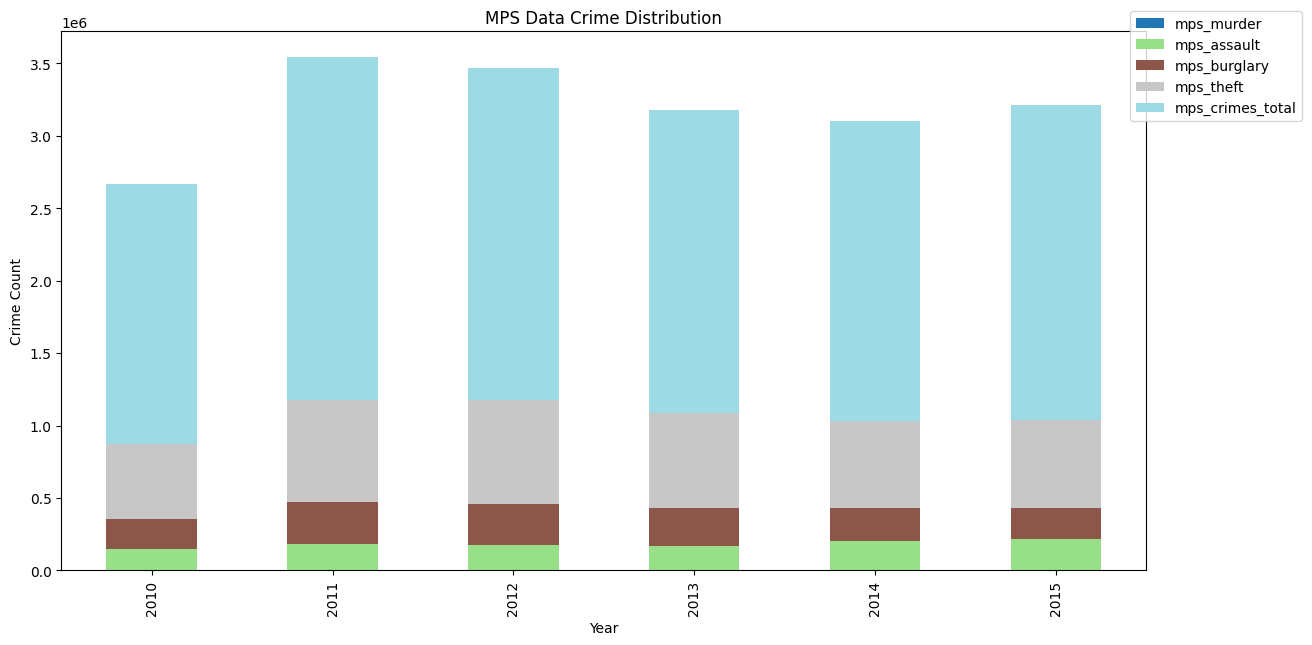

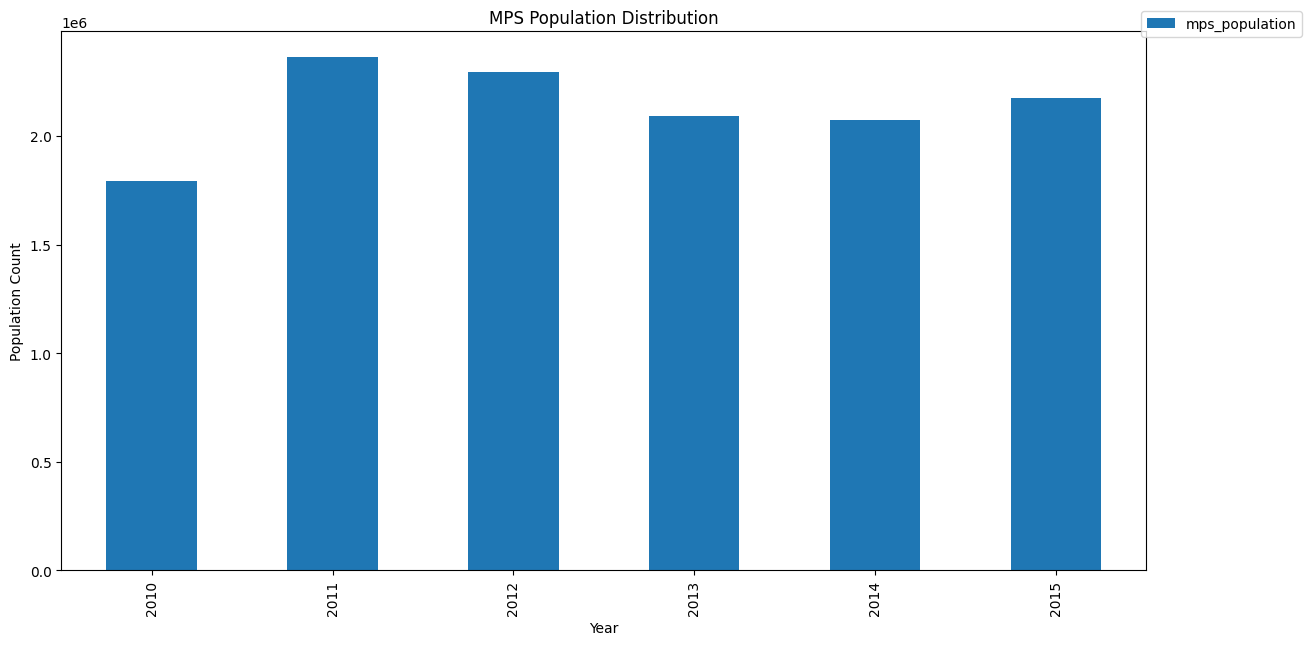

In [28]:
import matplotlib.pyplot as plt

# Function to plot stacked bar plots
def plot_stacked_bar(data, title, y_label, column_prefix):
    data_subset = data.filter(like=column_prefix).copy()
    data_subset.index = data['Year']
    data_subset.drop(columns=[f'{column_prefix}population'], inplace=True)  # Exclude population from this plot
    data_subset.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab20')
    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel('Year')
    plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.05))
    plt.show()

# Separate function to plot population data
def plot_population(data, title, y_label, column_prefix):
    data_subset = data[['Year', f'{column_prefix}population']].copy()
    data_subset.set_index('Year', inplace=True)
    data_subset.plot(kind='bar', figsize=(14, 7), colormap='tab20')
    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel('Year')
    plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.05))
    plt.show()

# Plot the combined data for reported crimes excluding population
plot_stacked_bar(combined_data, 'Reported Data Crime Distribution', 'Crime Count', 'reported_')

# Plot the population data for reported crimes
plot_population(combined_data, 'Reported Population Distribution', 'Population Count', 'reported_')

# Plot the combined data for MPS crimes excluding population
plot_stacked_bar(combined_data, 'MPS Data Crime Distribution', 'Crime Count', 'mps_')

# Plot the population data for MPS crimes
plot_population(combined_data, 'MPS Population Distribution', 'Population Count', 'mps_')



### Scatter Plots

Plotting Function: Creates scatter plots to examine the relationship between population size and total crime counts.
 Visualization: Scatter plots help identify correlations between population and crime data.

Benefits
    Relationship Identification: Helps identify correlations or lack thereof between population and crime 
d
    Visual Insights: Provides visual insights into how changes in population might affect crime rates.

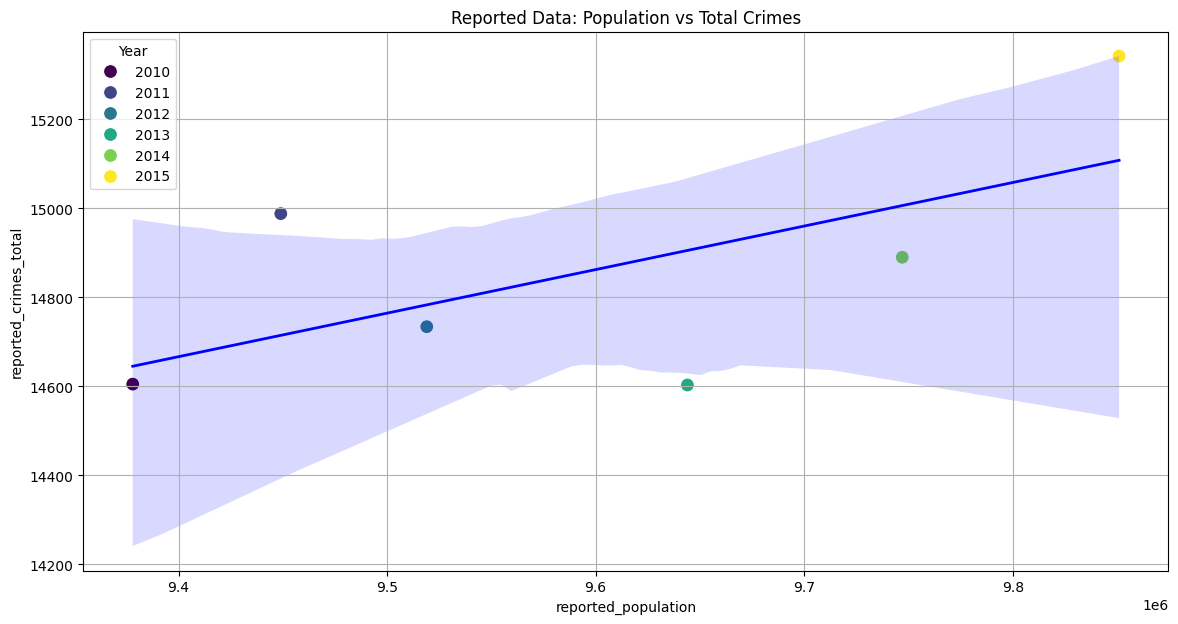

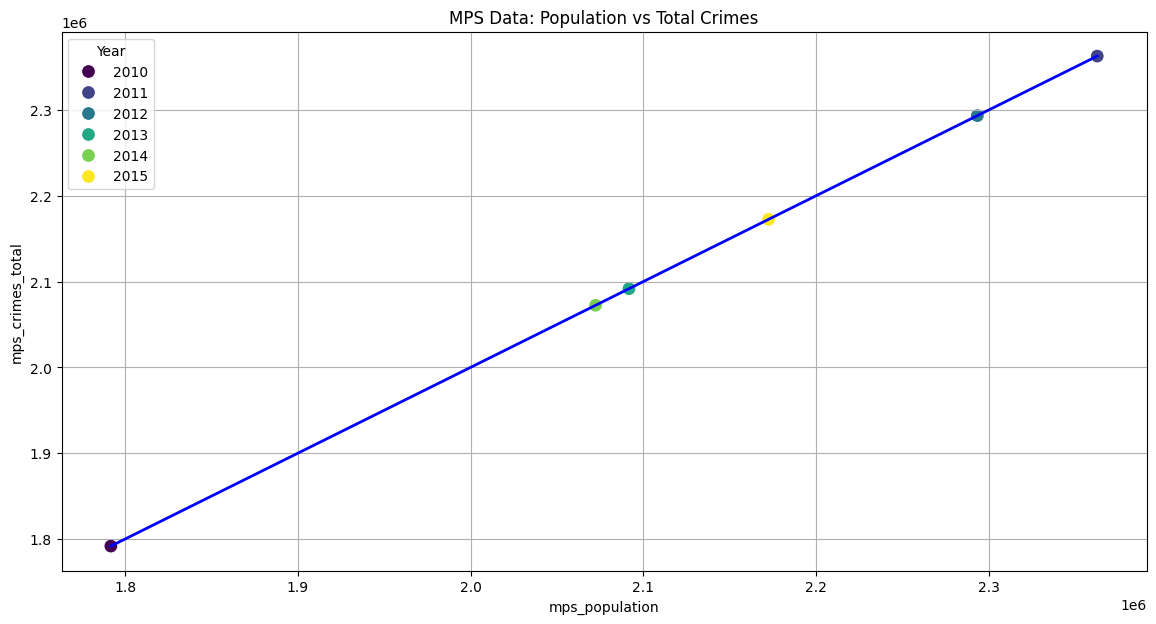

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot scatter plots with improvements
def plot_scatter(data, title, x_column, y_column, hue_column):
    plt.figure(figsize=(14, 7))
    sns.scatterplot(data=data, x=x_column, y=y_column, hue=hue_column, s=100, palette='viridis')
    sns.regplot(data=data, x=x_column, y=y_column, scatter=False, color='blue', line_kws={"linewidth": 2})
    plt.title(title)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.grid(True)
    plt.legend(title=hue_column)
    plt.show()

plot_scatter(combined_data, 'Reported Data: Population vs Total Crimes', 'reported_population', 'reported_crimes_total', 'Year')
plot_scatter(combined_data, 'MPS Data: Population vs Total Crimes', 'mps_population', 'mps_crimes_total', 'Year')


### Step 3: Perform Regression Analysis to Predict Crimes in 2025

Regression Analysis: Uses linear regression to predict future crime counts based on historical data.
 Visualization: Plots the regression line and future prediction, providing a visual representation of the trend and forecast.

Benefits
    Predictive Insights: Provides insights into future crime trends, crucial for planning and resource allocation.

    Historical Comparison: Allows comparison of predicted values with historical data, validating the accuracy of the model.

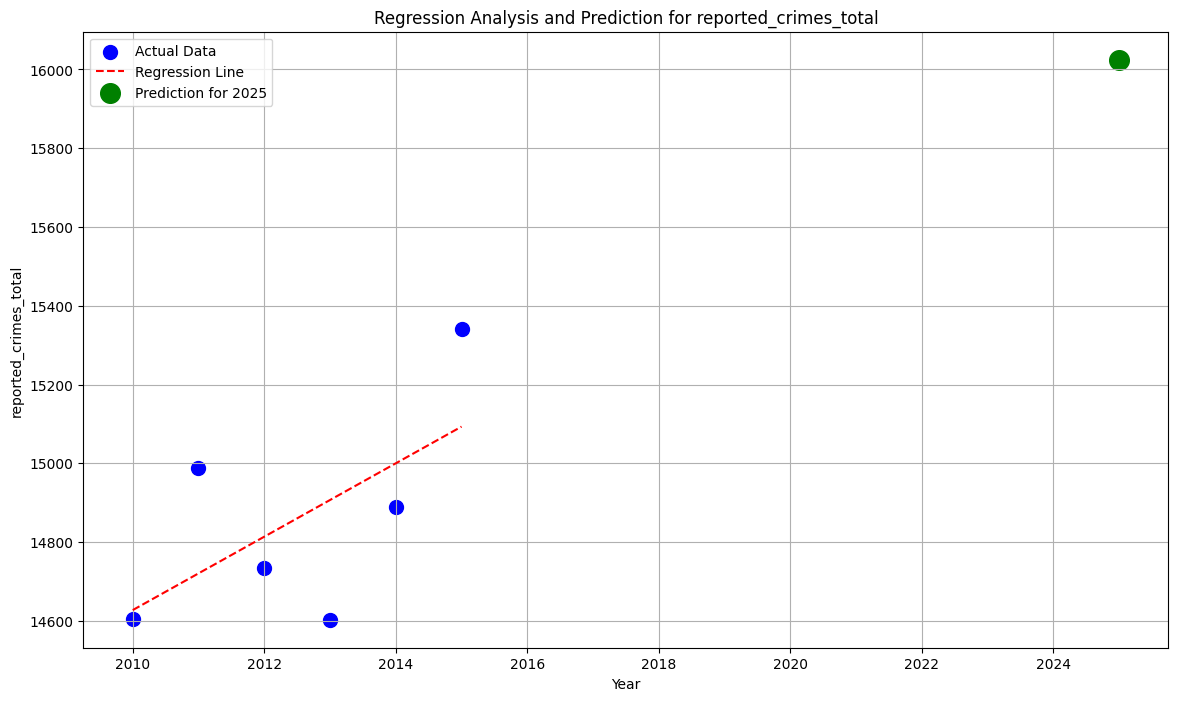

Predicted London Reported Crimes Total in 2025: 16024.619047619053


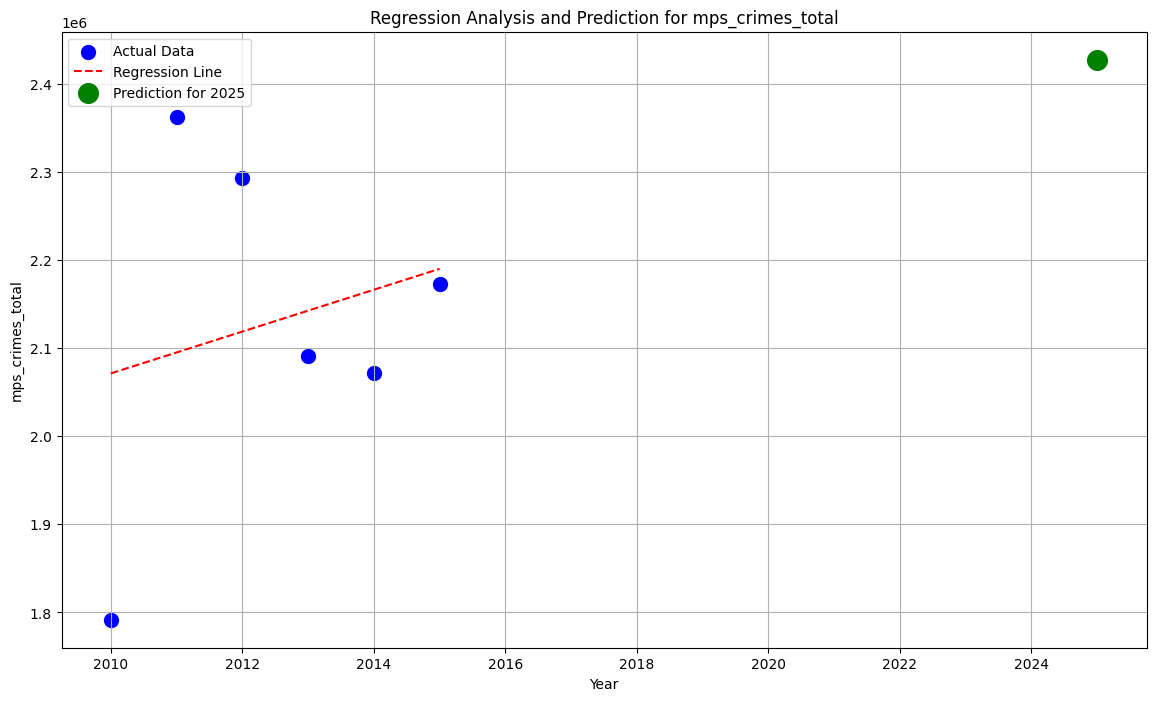

Predicted London MPS Crimes Total in 2025: 2427345.4285714254


In [31]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to perform regression and plot predictions
def plot_regression(data, column_name, target_year):
    X = data[['Year']]
    y = data[column_name]
    
    # Fit the model
    model = LinearRegression()
    model.fit(X, y)
    
    # Predict for the target year
    target_year_df = pd.DataFrame({'Year': [target_year]})
    prediction = model.predict(target_year_df)
    
    # Plot the data and the regression line
    plt.figure(figsize=(14, 8))
    plt.scatter(X, y, color='blue', label='Actual Data', s=100)
    plt.plot(X, model.predict(X), color='red', linestyle='--', label='Regression Line')
    plt.scatter(target_year, prediction, color='green', s=200, label=f'Prediction for {target_year}')
    plt.title(f'Regression Analysis and Prediction for {column_name}')
    plt.xlabel('Year')
    plt.ylabel(column_name)
    plt.grid(True)
    plt.legend()
    plt.show()
    
    return prediction[0]

# Example usage for predicting 2025 data
predicted_reported_2025 = plot_regression(combined_data, 'reported_crimes_total', 2025)
print(f'Predicted London Reported Crimes Total in 2025: {predicted_reported_2025}')

predicted_mps_2025 = plot_regression(combined_data, 'mps_crimes_total', 2025)
print(f'Predicted London MPS Crimes Total in 2025: {predicted_mps_2025}')

### Summary

Why Use These Plots:

Line Plots: Show trends over time, making it easy to see how crime rates change each year.
Bar Plots: Compare the total number of different types of crimes for specific years.
Stacked Bar Plots: Show the contribution of different types of crimes to the total, making it easy to visualize the distribution of crime types.
Scatter Plots: Examine the relationship between population size and total crime counts, revealing any correlations.
Regression Line Plots: Predict future crime counts and visualize them alongside historical data, providing insights into future trends.

Benefits:

Comprehensive Analysis: These plots provide a thorough analysis of the crime data, helping identify trends, compare datasets, and understand the distribution of crime types.
Visual Clarity: Visual representations make it easier to understand complex data, facilitating better decision-making.
Predictive Power: Regression analysis and predictions help in planning and resource allocation for future crime prevention efforts.